**Background**

Customer Segmentation is dividing customers based on common characteristics, such as demographics or behavior. Customer Segmentation aids organizations/companies maximize the value of each customer to the business. In this project, customers will be segmented based on their shopping behavior.  

RFM is an acronym for Recency, Frequency, and Monetary Value. RFM analysis is a data-driven customer behavior segmentation technique that is based on when their last purchase was (**Recency**), how often they have purchased in the past (**Frequency**), and how much they have spent overall (**Monetary Value**). RFM analysis can help an organization optimize personalized campaigns, improve conversion rates, and improve revenue and profits. 

Unsupervised Machine Learning is a technique where **Artificial Intelligence Algorithms learn patterns without supervision**. KMeans clustering is a form of **unsupervised ML algorithm** that segments observations into a 'k' number of clusters that share similarities. In this context, clustering will be carried out based on RFM segments. 

**Problem Statement & Objectives**

Our retail store is set to launch 3 different campaigns in order to **drive sales**, and the C-suite executives are requesting for an analysis dividing customers based on their interactions with company products, services, and their monetary value to tailor campaigns to it's intended audience. 

Some of the objectives of this project include:
- To have a thorough understanding of the dataset by carrying out EDA. 
- To segment customers based on RFM scores.
- To identify high-value customers who have made recent and frequent purchases with high monetary value using RFM Analysis.
- To categorize customers into clusters to tailor campaigns using KMeans Clustering.
- To proffer recommendations based on the cluster analysis results. 

**Methodology**

- Data Cleaning
- Data Transformation and Exploration
- RFM Segmentation
- Data pre-processing for KMeans clustering
- Choosing the optimal number of clusters using the **Elbow Criterion method**
- Interpreting clusters

## Data Dictionary 

A summary of each variable, data type, and description is shown below:

| Variable Name | Data Type | Description |
|---------------|---------------|---------------|
| InvoiceNo     | Categorical   | This is a 6-digit integral number uniquely assigned to each transaction. Some digits contains 'c' which indicates a canceled transaction.|
| StockCode     | Categorical   | This is a 5-digit number uniquely assigned to each product.|
| Description   | Categorical   | Product Name  |
| Quantity      | Numerical     | Number of product purchased in each transaction. |
| InvoiceDate   | DateTime      | Day and Date when each transaction occured. |
| UnitPrice     | Numerical     | This shows the product price per unit. |
| CustomerID    | Numerical     | This is a 5-digit number uniquely assigned to each customer per transaction. |
| Country       | Categorical   | Country where customer resides. |

### Data Cleaning


Here, some data cleaning process were carried out such as checking for nulls, changing data types, and renaming columns

In [248]:
#import libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime 
from sklearn.preprocessing import StandardScaler
import warnings
warnings.filterwarnings("ignore")
#import data
retail_df = pd.read_excel("C:\\Users\\User\\Downloads\\Data Camp Marketing courses\\Online Retail.xlsx")

In [249]:
#check first five columns
retail_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [250]:
#check data characteristics
retail_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [251]:
#Check for null values
retail_df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [252]:
#Check quantity column for negative values
(retail_df['Quantity'] < 0).sum()

10624

In [253]:
#Create new dataframe excluding negative values in the quantity column
retail_df1 = retail_df[retail_df['Quantity'] >= 0]

In [254]:
#Change the products name from upper to lower case
retail_df1['Description'] = retail_df['Description'].str.lower()

In [255]:
#Split into date time column
retail_df1['InvoiceDates'] = retail_df1['InvoiceDate'].dt.date
retail_df1['InvoiceTime'] = retail_df1['InvoiceDate'].dt.time

In [256]:
#Drop original invoice date column
retail_df1.drop(columns=['InvoiceDate'], inplace=True)

In [257]:
#convert invoicedate to date 
retail_df1['InvoiceDates'] = pd.to_datetime(retail_df1['InvoiceDates'])

In [258]:
#change name from invoicedates to invoicedate
retail_df1 = retail_df1.rename(columns={'InvoiceDates': 'InvoiceDate'})
retail_df1 = retail_df1.rename(columns={'Description': 'ProductName'})

In [259]:
#check dataframe info
retail_df1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 531285 entries, 0 to 541908
Data columns (total 9 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    531285 non-null  object        
 1   StockCode    531285 non-null  object        
 2   ProductName  530693 non-null  object        
 3   Quantity     531285 non-null  int64         
 4   UnitPrice    531285 non-null  float64       
 5   CustomerID   397924 non-null  float64       
 6   Country      531285 non-null  object        
 7   InvoiceDate  531285 non-null  datetime64[ns]
 8   InvoiceTime  531285 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(5)
memory usage: 40.5+ MB


**Summary of Data Cleaning**

- There are null values present in Description and CustomerID columns.
- There are negative values in the Quantity column, which were removed from the dataframe.
- Changed product names from upper to lower case
- split invoice date columns into date and time columns.
- Converted date and time columns to correct format.
- Renamed columns.
- Leave null values in Product Names and CustomerID columns.

## Data Transformation and Exploration

For this part, some transformations such as grouping and exploration with visualizations were carried out. 

In [260]:
#define a function to count unique values in dataframe
def count(retail_df1):
    unique_counts = {}
    for column in retail_df1.columns:
        unique_counts[column] = retail_df1[column].nunique()
    return unique_counts

In [261]:
#check the number of unique transactions
unique_counts = count(retail_df1)
print(unique_counts)

{'InvoiceNo': 20728, 'StockCode': 3941, 'ProductName': 4072, 'Quantity': 393, 'UnitPrice': 1293, 'CustomerID': 4339, 'Country': 38, 'InvoiceDate': 305, 'InvoiceTime': 741}


In [262]:
#check for unique countries
retail_df1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Finland',
       'Austria', 'Bahrain', 'Israel', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [263]:
#check how many transactions were carried out in the 'Unspecified' labeled country
retail_df1['Country'].value_counts().get('Unspecified', 0)

446

In [264]:
#check the max date 
retail_df1['InvoiceDate'].max()

Timestamp('2011-12-09 00:00:00')

In [265]:
#check the min date 
retail_df1['InvoiceDate'].min()

Timestamp('2010-12-01 00:00:00')

In [266]:
#check the number of transactions per country
retail_df1.groupby(['Country'])['InvoiceNo'].count()

Country
Australia                 1185
Austria                    398
Bahrain                     18
Belgium                   2031
Brazil                      32
Canada                     151
Channel Islands            748
Cyprus                     614
Czech Republic              25
Denmark                    380
EIRE                      7894
European Community          60
Finland                    685
France                    8408
Germany                   9042
Greece                     145
Hong Kong                  284
Iceland                    182
Israel                     295
Italy                      758
Japan                      321
Lebanon                     45
Lithuania                   35
Malta                      112
Netherlands               2363
Norway                    1072
Poland                     330
Portugal                  1501
RSA                         58
Saudi Arabia                 9
Singapore                  222
Spain                     2485


In [267]:
#create a new month column
retail_df1['Month'] = retail_df1['InvoiceDate'].dt.month_name()

In [268]:
#define function for transactions and quantity
def transactions_quantity(retail_df1):
    transactions_per_month = retail_df1.groupby(['Month'])['InvoiceNo'].nunique()
    transactions_per_country = retail_df1.groupby(['Country'])['InvoiceNo'].nunique()
    quantity_per_country = retail_df1.groupby(['Country'])['Quantity'].sum()
    quantity_per_month = retail_df1.groupby(['Month'])['Quantity'].nunique()
    return transactions_per_month, transactions_per_country, quantity_per_country, quantity_per_month

In [269]:
transactions_per_month, transactions_per_country, quantity_per_country, quantity_per_month = transactions_quantity(retail_df1)
print(transactions_per_month, transactions_per_country, quantity_per_country, quantity_per_month)

Month
April        1318
August       1409
December     2468
February     1126
January      1120
July         1540
June         1576
March        1531
May          1731
November     2884
October      2129
September    1896
Name: InvoiceNo, dtype: int64 Country
Australia                  57
Austria                    17
Bahrain                     3
Belgium                    98
Brazil                      1
Canada                      6
Channel Islands            26
Cyprus                     16
Czech Republic              2
Denmark                    18
EIRE                      288
European Community          4
Finland                    41
France                    392
Germany                   457
Greece                      5
Hong Kong                  11
Iceland                     7
Israel                      8
Italy                      38
Japan                      19
Lebanon                     1
Lithuania                   4
Malta                       5
Netherlands         

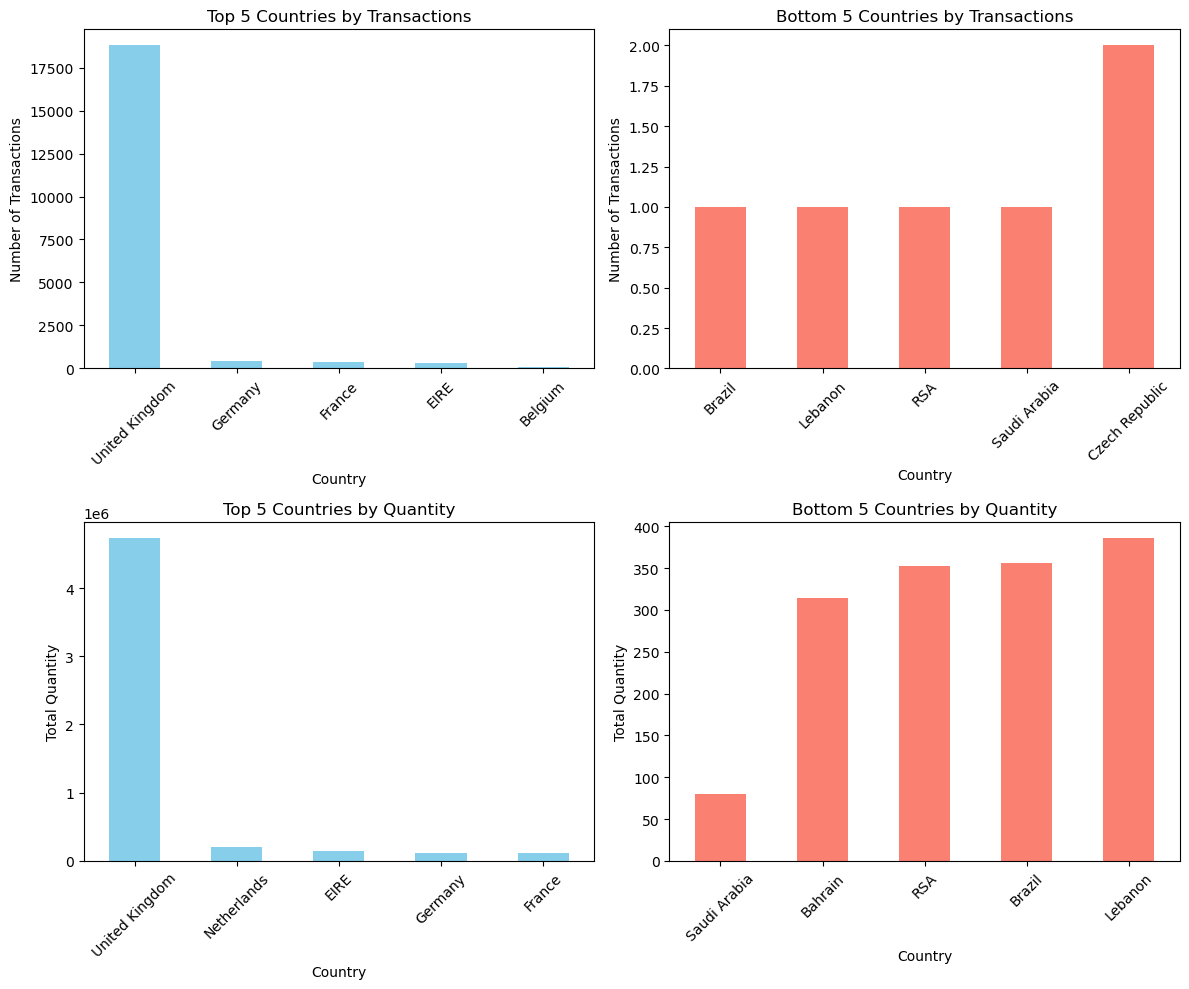

In [270]:
#top 5 and bottom 5 countries by transactions
top_countries_transactions = retail_df1.groupby('Country')['InvoiceNo'].nunique().nlargest(5)
bottom_countries_transactions = retail_df1.groupby('Country')['InvoiceNo'].nunique().nsmallest(5)

#top 5 and bottom 5 countries by quantity
top_countries_quantity = retail_df1.groupby('Country')['Quantity'].sum().nlargest(5)
bottom_countries_quantity = retail_df1.groupby('Country')['Quantity'].sum().nsmallest(5)

#initialize subplots and figure size 
fig, axes = plt.subplots(2, 2, figsize=(12, 10))

#plot top 5 countries by transactions
top_countries_transactions.plot(kind='bar', ax=axes[0, 0], color='skyblue')
axes[0, 0].set_title('Top 5 Countries by Transactions')
axes[0, 0].set_ylabel('Number of Transactions')
axes[0, 0].tick_params(axis='x', rotation=45)

#plot bottom 5 countries by transactions
bottom_countries_transactions.plot(kind='bar', ax=axes[0, 1], color='salmon')
axes[0, 1].set_title('Bottom 5 Countries by Transactions')
axes[0, 1].set_ylabel('Number of Transactions')
axes[0, 1].tick_params(axis='x', rotation=45)

#plot top 5 countries by quantity
top_countries_quantity.plot(kind='bar', ax=axes[1, 0], color='skyblue')
axes[1, 0].set_title('Top 5 Countries by Quantity')
axes[1, 0].set_ylabel('Total Quantity')
axes[1, 0].tick_params(axis='x', rotation=45)

#plot bottom 5 countries by quantity
bottom_countries_quantity.plot(kind='bar', ax=axes[1, 1], color='salmon')
axes[1, 1].set_title('Bottom 5 Countries by Quantity')
axes[1, 1].set_ylabel('Total Quantity')
axes[1, 1].tick_params(axis='x', rotation=45)

#fit and show plots
plt.tight_layout()
plt.show()

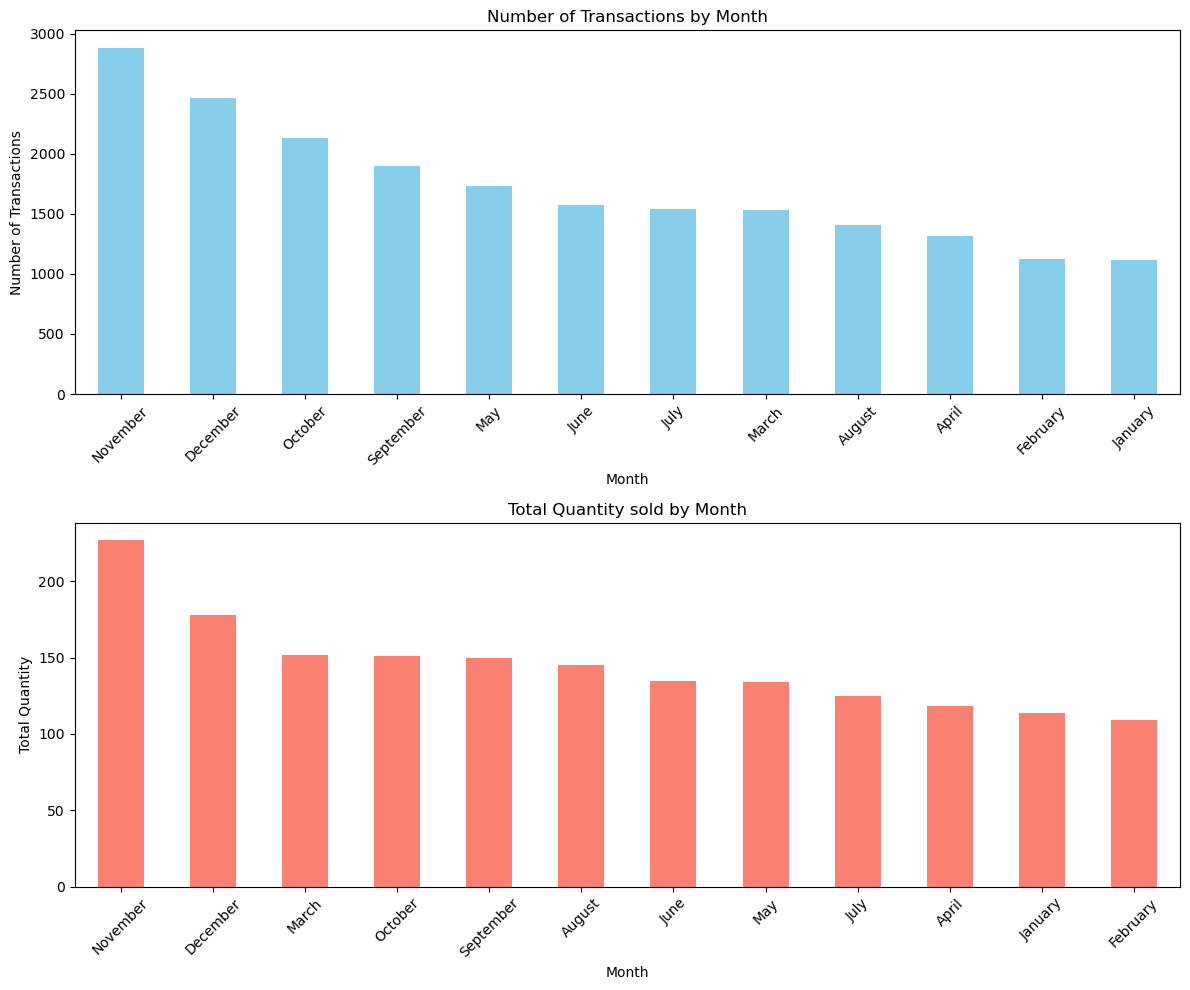

In [271]:
monthly_transactions = retail_df1.groupby('Month')['InvoiceNo'].nunique().sort_values(ascending=False)
monthly_quantity = retail_df1.groupby('Month')['Quantity'].nunique().sort_values(ascending=False)

fig, axes = plt.subplots(2, 1, figsize=(12, 10))

monthly_transactions.plot(kind='bar', ax=axes[0], color='skyblue')
axes[0].set_title('Number of Transactions by Month')
axes[0].set_ylabel('Number of Transactions')
axes[0].tick_params(axis='x', rotation=45)

monthly_quantity.plot(kind='bar', ax=axes[1], color='salmon')
axes[1].set_title('Total Quantity sold by Month')
axes[1].set_ylabel('Total Quantity')
axes[1].tick_params(axis='x', rotation=45)

#fit and show plots
plt.tight_layout()
plt.show()

**Summary of EDA**

- There were over 20,000 unique transactions carried out over the period of one year. 
- The timeline of this data runs from 01/12/2010 to 09/12/2011. 
- Customers from the United Kingdom, Germany, Ireland, and France are amongst the top spenders.
- Customers from Saudi Arabia, Lebanon, Brazil, and South Africa are amongst the bottom spenders.
- Months with most patronage were December, November, and October.
- Months with least patronage were January, February, and April.

**RFM Segmentation**

There are several ways to group RFM values, in this context we will use Percentiles. e.g,. Quartiles

In [272]:
#calculate totalSum from the dataframe
retail_df1['TotalSum'] = retail_df1['UnitPrice'] * retail_df1['Quantity'] 

In [273]:
#create a new df named recent_date 
recent_date = max(retail_df1.InvoiceDate) + datetime.timedelta(days=1)

In [274]:
#Group by CustomerID, and aggregate 3 columns 
new_retaildf = retail_df1.groupby(['CustomerID']).agg({
    'InvoiceDate': lambda x: (recent_date-x.max()).days,
    'InvoiceNo': 'count',
    'TotalSum': 'sum'})

#Rename columns 
new_retaildf.rename(columns = {'InvoiceDate': 'Recency',
                               'InvoiceNo': 'Frequency',
                               'TotalSum': 'MonetaryValue'}, inplace=True)

#check top 5 rows of new df
new_retaildf.head()

,Recency,Frequency,MonetaryValue
CustomerID,,,
12346.0,326,1,77183.60
12347.0,3,182,4310.00
12348.0,76,31,1797.24
12349.0,19,73,1757.55
12350.0,311,17,334.40


Calculate quartile for each column


In [275]:
#create recency quartile
r_labels = range(4,0,-1)
r_quartiles = pd.cut(new_retaildf['Recency'], 4, labels = r_labels)
new_retaildf = new_retaildf.assign(R = r_quartiles.values)

In [276]:
#create frequency quartile
f_labels = range(1,5)
f_quartiles = pd.cut(new_retaildf['Frequency'], 4, labels = f_labels)
new_retaildf = new_retaildf.assign(F = f_quartiles.values)

In [277]:
#create monetaryvalue quartile
m_labels = range(1,5)
m_quartiles = pd.cut(new_retaildf['MonetaryValue'], 4, labels = m_labels)
new_retaildf = new_retaildf.assign(M = m_quartiles.values)

In [278]:
#check top rows with newly added columns
new_retaildf.head()

,Recency,Frequency,MonetaryValue,R,F,M
CustomerID,,,,,,
12346.0,326,1,77183.60,1,1,2
12347.0,3,182,4310.00,4,1,1
12348.0,76,31,1797.24,4,1,1
12349.0,19,73,1757.55,4,1,1
12350.0,311,17,334.40,1,1,1


In [279]:
#check dataframe characteristics
new_retaildf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Recency        4339 non-null   int64   
 1   Frequency      4339 non-null   int64   
 2   MonetaryValue  4339 non-null   float64 
 3   R              4339 non-null   category
 4   F              4339 non-null   category
 5   M              4339 non-null   category
dtypes: category(3), float64(1), int64(2)
memory usage: 148.7 KB


In [280]:
#create RFM segment and RFM score 
def join_rfm(x): return str(int(x['R'])) + str(int(x['F'])) + str(int(x['M']))
new_retaildf['RFM_Segment'] = new_retaildf.apply(join_rfm, axis = 1)
new_retaildf['RFM_Score'] = new_retaildf[['R','F','M']].sum(axis = 1)

#check for newly created columns
new_retaildf.head()

,Recency,Frequency,MonetaryValue,R,F,M,RFM_Segment,RFM_Score
CustomerID,,,,,,,,
12346.0,326,1,77183.60,1,1,2,112,4
12347.0,3,182,4310.00,4,1,1,411,6
12348.0,76,31,1797.24,4,1,1,411,6
12349.0,19,73,1757.55,4,1,1,411,6
12350.0,311,17,334.40,1,1,1,111,3


In [281]:
#count RFM segments
new_retaildf.groupby('RFM_Segment').size().sort_values(ascending=False)[:12]

RFM_Segment
411    2905
311     601
211     469
111     349
412       4
413       2
421       2
431       2
112       1
414       1
424       1
433       1
dtype: int64

In [282]:
#view stats of RFM values
new_retaildf.groupby('RFM_Score').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count'] }).round(1)

Recency Frequency MonetaryValue      
             mean      mean          mean count
RFM_Score                                      
3           328.0      24.2         388.2   349
4           233.6      26.0         773.5   470
5           138.6      44.6         858.0   601
6            33.1     108.8        2142.1  2905
7            13.3    1400.0       81217.7     6
8             4.0    2511.8      115477.0     4
9             1.5    4139.0      150324.4     2
10            2.0    3878.5      212015.5     2

In [283]:
#further segment into gold, silver and bronze customers. 
def segment_me(df):
    if df['RFM_Score'] >= 9:
        return 'Gold'
    elif (df['RFM_Score'] >= 5) and (df['RFM_Score'] < 9):
        return 'Silver'
    else:
        return 'Bronze'
new_retaildf['General_Segment'] = new_retaildf.apply(segment_me, axis=1)
new_retaildf.groupby('General_Segment').agg({
'Recency': 'mean',
'Frequency': 'mean',
'MonetaryValue': ['mean', 'count']}).round(1)

Recency Frequency MonetaryValue      
                   mean      mean          mean count
General_Segment                                      
Bronze            273.9      25.2         609.3   819
Gold                1.8    4008.8      181170.0     4
Silver             51.0     102.7        2186.5  3516

I further divided the segments into Gold, Silver, and Bronze segments. Customers with RFM score greater than 9 is labelled as a Gold customer, customers with RFM score between 5 and 9 Silver customers, and RFM score lower than 5, Bronze customers. 

Gold Customers - Just **4** customers are **Gold Customers**. For this group of people, we need to keep them happy so that they can continue visiting our stores, interacting with our products and services, and spending more on the business. Example of campaigns to offer this segment include **providing early access to limited edition or premium products**

Silver Customers - Majority of customer fall into the Silver segment. We can **offer discounts/loyalty rewards based on spending levels to encourage higher spending**


Bronze Customers - A little over **800** customers are **Bronze customers**. These customers need to be treated specially as we are probably on the verge of losing them. We can **send these customers re-engagement campaigns to increase their engagement and loyalty**. 

**K Means Clustering**

Here, before carrying out KMeans clustering, we have to check the distribution of the variables to see if it satisfies the conditions of KMeans clustering. 

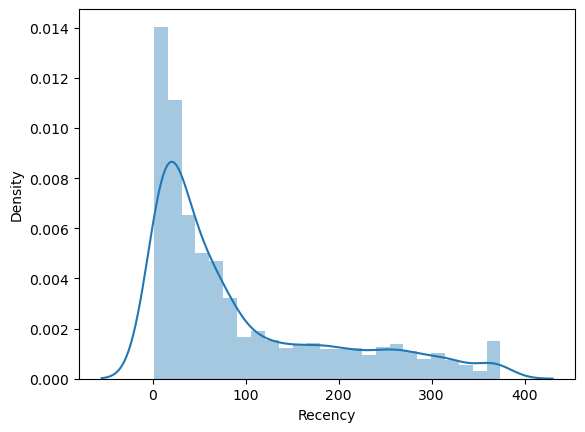

In [297]:
#check distribution for Recency
sns.distplot(new_retaildf['Recency']);

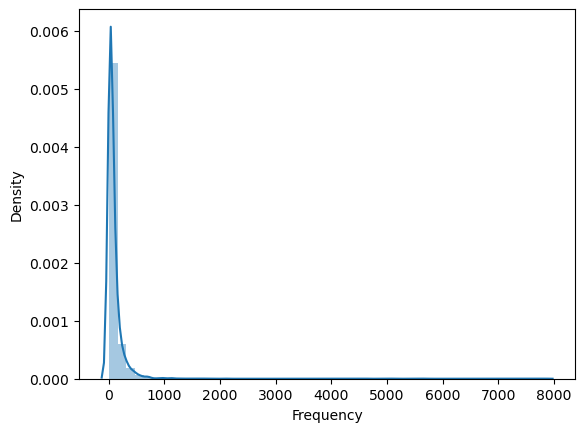

In [298]:
#check distribution for Frequency
sns.distplot(new_retaildf['Frequency']);

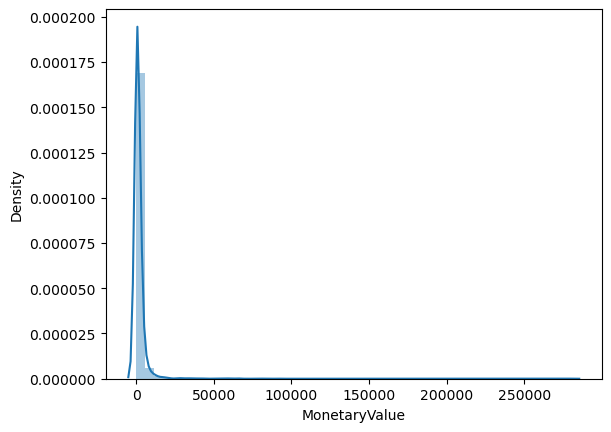

In [299]:
#check distribution for MonetaryValue
sns.distplot(new_retaildf['MonetaryValue']);

As we observe, the distributions are Skewed. Skewed distributions do not meet the criteria for KMeans clustering. Therefore, Cube root transformation will be carried out to make the distribution look more bell shaped and normalization to make mean and standard deviation values 0 and 1 respectively i.e. standardized.  

In [287]:
#check data characteistics
new_retaildf.info()

<class 'pandas.core.frame.DataFrame'>
Index: 4339 entries, 12346.0 to 18287.0
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Recency          4339 non-null   int64   
 1   Frequency        4339 non-null   int64   
 2   MonetaryValue    4339 non-null   float64 
 3   R                4339 non-null   category
 4   F                4339 non-null   category
 5   M                4339 non-null   category
 6   RFM_Segment      4339 non-null   object  
 7   RFM_Score        4339 non-null   int64   
 8   General_Segment  4339 non-null   object  
dtypes: category(3), float64(1), int64(3), object(2)
memory usage: 250.4+ KB


In [288]:
#remove unwanted columns
remove = ['R', 'F', 'M', 'RFM_Segment', 'RFM_Score', 'General_Segment']
new_retaildf.drop(columns = remove, inplace = True)

#unskew data
cube_retaildf = new_retaildf.applymap(lambda x: np.cbrt(x) if x >= 0 else -np.cbrt(-x))


#normalize variables
scaler = StandardScaler()
scaler.fit(cube_retaildf)

normalized_retaildf = scaler.transform(cube_retaildf)

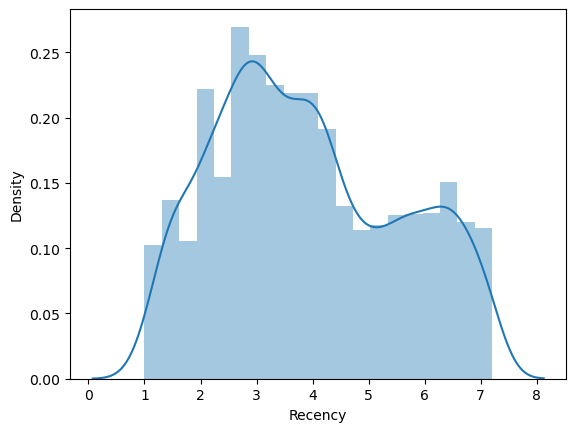

In [300]:
#check distribution for Recency
sns.distplot(cube_retaildf['Recency']);

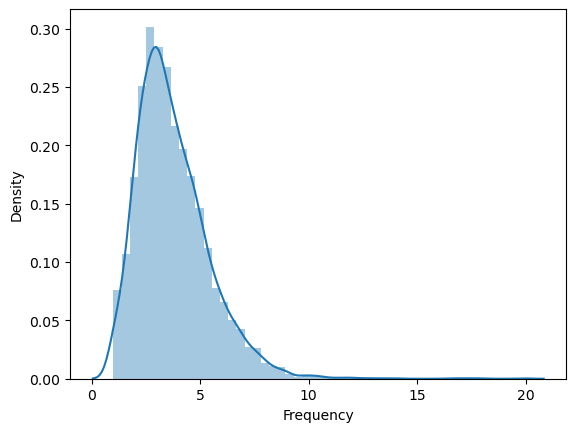

In [301]:
#check distribution for Frequency
sns.distplot(cube_retaildf['Frequency']);

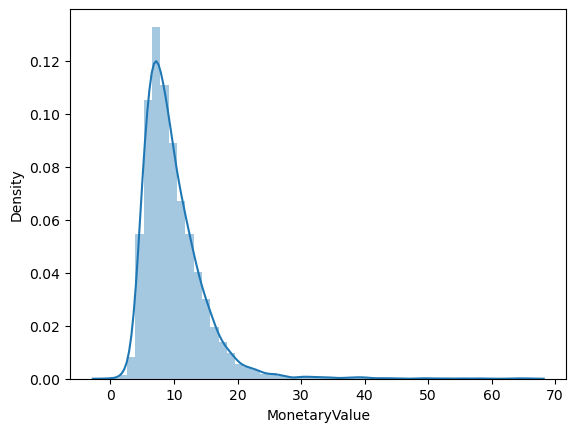

In [302]:
#check distribution for MonetaryValue
sns.distplot(cube_retaildf['MonetaryValue']);

Now, the distribution looks better. Although not completely bell shaped, but we can work with the data this way. One of the limitations of this study is that Log transformation could not be used as the mean and SD gave negative values. 

**Determining the number of clusters**

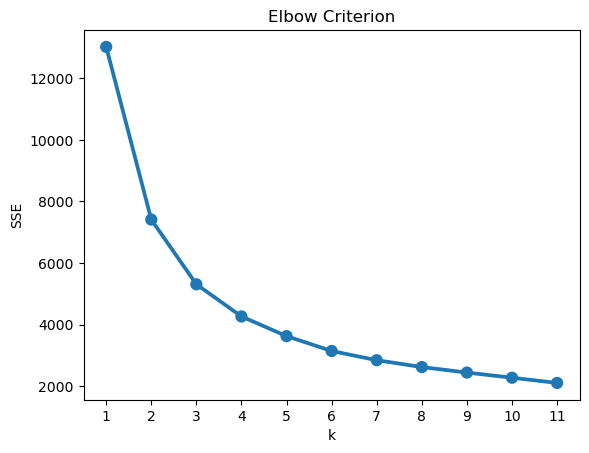

In [292]:
#plot elbow criterion graph
from sklearn.cluster import KMeans

sse = {}
for k in range(1,12):
    kmeans = KMeans(n_clusters = k, random_state = 1)
    kmeans.fit(normalized_retaildf)
    sse[k] = kmeans.inertia_

plt.title('Elbow Criterion')
plt.xlabel('k');plt.ylabel('SSE')
sns.pointplot(x = list(sse.keys()), y = list(sse.values()))
plt.show()

From the Elbow criterion graph, we can see that the optimized number of clusters is between **2-3 groups**.

**Results**:

Next is to do some comparision between 2 and 3 clusters to check which of the clusters gives more granularity for our metrics, and can answer our business questions.

In [293]:
#create 2 cluster metrics
kmeans = KMeans(n_clusters = 2, random_state = 1)
kmeans.fit(normalized_retaildf)
cluster_labels = kmeans.labels_
retail_k2 = new_retaildf.assign(Cluster = cluster_labels)

In [294]:
retail_k2.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean','count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0         132.0      29.0         519.0  2733
1          26.0     199.0        4666.0  1606

In [295]:
#create 3 cluster metrics
kmeans = KMeans(n_clusters = 3, random_state = 1)
kmeans.fit(normalized_retaildf)
cluster_labels = kmeans.labels_
retail_k3 = new_retaildf.assign(Cluster = cluster_labels)

In [296]:
retail_k3.groupby(['Cluster']).agg({
    'Recency': 'mean',
    'Frequency': 'mean',
    'MonetaryValue': ['mean','count'],
}).round(0)

Recency Frequency MonetaryValue      
           mean      mean          mean count
Cluster                                      
0          24.0     301.0        7679.0   832
1          39.0      54.0         909.0  2061
2         210.0      24.0         448.0  1446

3 clusters gives more granular and detailed results that can answer the business question.

Cluster 0 - These are our best customers, and best to make them happy as they add value to the business. Some campaigns we can offer them include: **offering VIP perks such as priority customer service, free shipping, or exclusive events. Create special loyalty programs with exclusive benefits for top spenders**. 

Cluster 1 - These are our second best customers, we will try to make them happy, and send them targeted campaigns to increase their spend. Some campaigns to offer these set of customers are: **Recommeding complementary products or services that enhamnces their current purchases. Provide personalized product recommendations based on their last purchase and preferences**. 

Cluster 2 - These are our worst customers, we need to treat them specially not only to increase their spend, but to make them engaged in our products and services as we are about to lose them/ they are not adding significant value to the business. Campaigns targeted to these customers should include: **Offering special discounts or promotions to incentivize purchases, highlight affordable products or services that provide good value for money, provide referral bonuses or loyalty rewards to encourage repeat purchases**.